Reading Libraries

In [92]:
import zipfile
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import skimage
from skimage import io
import numpy as np
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator

Connect google drive to read dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extract zip dataset file containing images

In [ ]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/drive/MyDrive/FaceShape Dataset.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
FaceShape Dataset/training_set/Heart/heart (718).jpg 2020-01-08 11:48:04       154024
__MACOSX/FaceShape Dataset/training_set/Heart/._heart (718).jpg 2020-01-08 11:48:04          212
FaceShape Dataset/training_set/Heart/heart (348).jpg 2020-01-08 11:48:00        58084
__MACOSX/FaceShape Dataset/training_set/Heart/._heart (348).jpg 2020-01-08 11:48:00          212
FaceShape Dataset/training_set/Heart/heart (124).jpg 2020-01-08 11:47:58        61463
__MACOSX/FaceShape Dataset/training_set/Heart/._heart (124).jpg 2020-01-08 11:47:58          212
FaceShape Dataset/training_set/Heart/heart (574).jpg 2020-01-08 11:48:02       157394
__MACOSX/FaceShape Dataset/training_set/Heart/._heart (574).jpg 2020-01-08 11:48:02          212
FaceShape Dataset/training_set/Heart/heart (827).jpg 2020-01-08 11:48:06        60051
__MACOSX/FaceShape Dataset/training_set/Heart/._heart (827).jpg 2020-01-08 11:48:06          212
FaceShape Dataset/training_set/Hea

Extract test dataset zip

In [ ]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/drive/MyDrive/Oval.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
Oval/                                          2018-11-07 09:02:54            0
__MACOSX/._Oval                                2018-11-07 09:02:54          212
Oval/img_no_259.jpg                            2018-11-07 09:02:54        32045
__MACOSX/Oval/._img_no_259.jpg                 2018-11-07 09:02:54          212
Oval/img_no_265.jpg                            2018-11-07 09:02:54       108638
__MACOSX/Oval/._img_no_265.jpg                 2018-11-07 09:02:54          212
Oval/img_no_271.jpg                            2018-11-07 09:02:54        30976
__MACOSX/Oval/._img_no_271.jpg                 2018-11-07 09:02:54          212
Oval/img_no_270.jpg                            2018-11-07 09:02:54        55619
__MACOSX/Oval/._img_no_270.jpg                 2018-11-07 09:02:54          212
Oval/img_no_264.jpg                            2018-11-07 09:02:54        36622
__MACOSX/Oval/._img_no_264.jpg          

Set Path for training and testing set

In [ ]:
train_path='/content/FaceShape Dataset/training_set/'

test_path2='/content/FaceShape Dataset/testing_set/'

Make instance of ImageDataGenerator to read images

In [ ]:
#Read training and testing images
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
#Read final testing images for evaluation
eval_datagen=ImageDataGenerator(rescale=1 / 255.0)

Using flow_from_directory to read images

In [ ]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    directory=path,
    target_size=(224,224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)

Found 3999 images belonging to 5 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=path2,
    target_size=(224,224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 1000 images belonging to 5 classes.


In [ ]:
eval_generator = eval_datagen.flow_from_directory(
    directory='/content/evaa',
    target_size=(224,224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 100 images belonging to 1 classes.


Importing libraries for building model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import ZeroPadding2D
from keras.layers import Convolution2D
from keras.layers import ZeroPadding2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten

#Tranfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

In this post, you will discover how you can use transfer learning to speed up training and improve the performance of your deep learning model.


**Pre-trained Model Approach**

Select Source Model. A pre-trained source model is chosen from available models. Many research institutions release models on large and challenging datasets that may be included in the pool of candidate models from which to choose from.
Reuse Model. The model pre-trained model can then be used as the starting point for a model on the second task of interest. This may involve using all or parts of the model, depending on the modeling technique used.
Tune Model. Optionally, the model may need to be adapted or refined on the input-output pair data available for the task of interest.

**Transfer Learning Using VGG Face model**

Briefly, the VGG-Face model is the same NeuralNet architecture as the VGG16 model used to identity 1000 classes of object in the ImageNet competition. The VGG16 name simply states the model originated from the Visual Geometry Group and that it was 16 trainable layers. The main difference between the VGG16-ImageNet and VGG-Face model is the set of calibrated weights as the training sets were different.

The model architecture (see page 6, table 3) https://www.robots.ox.ac.uk/~vgg/publications/2015/Parkhi15/parkhi15.pdf 
 is a linear sequence of layer transformations of the following types :

Convolution + ReLU activations
MaxPooling
softmax


#Model architecture of VGG-Face model


In [94]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_26 (ZeroPadd  (None, 226, 226, 1)      0         
 ing2D)                                                          
                                                                 
 conv2d_32 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 zero_padding2d_27 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                      

Download and load model's weights 'vgg_face weights'

Link to download : https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing

In [95]:
from keras.models import model_from_json
model.load_weights('/content/drive/MyDrive/vgg_face_weights.h5')

Freeze all layers except output layer which is last layer to only train output layer not all pre trained layers

In [98]:
model = tf.keras.Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)

In [99]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_52_input (In  [(None, 224, 224, 3)]    0         
 putLayer)                                                       
                                                                 
 zero_padding2d_52 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_64 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_53 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_65 (Conv2D)          (None, 224, 224, 64)      36928     
                                                           

Freeze model training by assigning false to model.trainable and make new model and pass the freezed model as first layer to the model and define other layers which you want to train

In [ ]:
# Set this parameter to make sure it's not being trained
model.trainable = False
mode = tf.keras.Sequential([ 
        model,
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.45),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

In [ ]:

mode.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 2622)              145002878 
                                                                 
 dense_8 (Dense)             (None, 1024)              2685952   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)              

Compile model

In [ ]:
mode.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

Set early stopping methods to prevent overfitting

In [ ]:

early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Train model with num of epochs you desire

In [ ]:
history=mode.fit_generator(train_generator,
                    validation_data = test_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = test_generator.n//test_generator.batch_size,
                    epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
15/15 [==============================] - 61s 4s/step - loss: 1.5149 - accuracy: 0.3462 - val_loss: 1.2523 - val_accuracy: 0.5130
Epoch 2/10
15/15 [==============================] - 57s 4s/step - loss: 1.2186 - accuracy: 0.5114 - val_loss: 1.0628 - val_accuracy: 0.5990
Epoch 3/10
15/15 [==============================] - 56s 4s/step - loss: 1.0007 - accuracy: 0.6262 - val_loss: 0.9127 - val_accuracy: 0.6693
Epoch 4/10
15/15 [==============================] - 56s 4s/step - loss: 0.9252 - accuracy: 0.6530 - val_loss: 0.8754 - val_accuracy: 0.6641
Epoch 5/10
15/15 [==============================] - 56s 4s/step - loss: 0.8560 - accuracy: 0.6783 - val_loss: 0.7728 - val_accuracy: 0.7292
Epoch 6/10
15/15 [==============================] - 57s 4s/step - loss: 0.7846 - accuracy: 0.7117 - val_loss: 0.7402 - val_accuracy: 0.7253
Epoch 7/10
15/15 [==============================] - 56s 4s/step - loss: 0.7128 - accuracy: 0.7441 - val_loss: 0.6692 - val_accuracy: 0.7500
Epoch 8/10
15/15 [==

In [ ]:
print("Average Training Accuracy : ",sum(history.history['accuracy'])/10)
print("Average Test Accuracy : ",sum(history.history['val_accuracy'])/10)

Average Training Accuracy :  0.6596564203500748
Average Test Accuracy :  0.6944010376930236


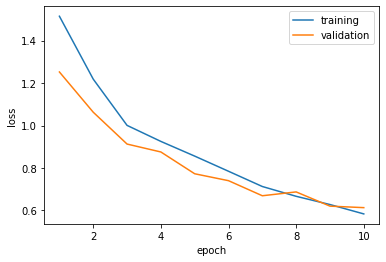

In [ ]:
 %matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,10+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
predict.shape

(93, 5)

Finally testing our model on unseen data

In [ ]:
STEP_SIZE_TEST=eval_generator.n//eval_generator.batch_size
eval_generator.reset()
pred=final.predict_generator(eval_generator,
steps=STEP_SIZE_TEST,
verbose=1)

  2/100 [..............................] - ETA: 6s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


100/100 [==============================] - 6s 65ms/step


See predictions by converting integer to its categorical form

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

Save the model to desired path

In [ ]:
model.save('/content/drive/MyDrive/face_model_final')